In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import gffutils as gf

import openpyxl
import os
import glob
import sys

from natsort import natsorted
from tqdm import tqdm
from collections import OrderedDict

In [2]:
path = 'C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\41564_2021_979_MOESM4_ESM.xlsx'

df_TOC = pd.read_excel (path, sheet_name="TOC")

df_tab_02 = pd.read_excel (path, sheet_name = "Suppl_Table_02")
df_tab_04 = pd.read_excel (path, sheet_name = "Suppl_Table_04")
df_tab_07 = pd.read_excel (path, sheet_name = "Suppl_Table_07")

df_TOC

,Table of Contents:,Unnamed: 1
0,NaN,NaN
1,Suppl_Table_01,"Bin information (taxonomy, metrics, biogeograp..."
2,Suppl_Table_02,Marker KEGG Kos.
3,Suppl_Table_03,Mixotrophic RuBisCo coding MAGs.
4,Suppl_Table_04,Environmental metadata
5,Suppl_Table_05,Pools of metagenomes for co-assembly.
6,Suppl_Table_06,Silva annotation of 16S rRNA gene sequences.
7,Suppl_Table_07,Metagenomic read recruitments.
8,Suppl_Table_08,Metatranscriptomic read recruitments.
9,Suppl_Table_09,Metagenomic RPKGs.


In [3]:
path = "C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\"      # generic path to use for next code
db = pd.read_csv(path + "STATvsTOA.csv", index_col=0)                          # path to STATvsTOA (index_col to set the first col as index)
db.index.name = "Station"                                                      # to set the index name as Station 
dir_path = path + "royo-et-al-2020_TARA-Arctic-HQ-MQ-MAG-set-annotation\\"     # path to the .tsv directory
stations = db.index.values                                                     # array contenente le stations 
TOA_columns = db.columns.values                                                # array contenente tutti i MAGs
mdict = OrderedDict()                                                          # to create the dictionary             
fl = natsorted(list(os.listdir(dir_path)))                                     # naturally sorted list

for i in tqdm(range(len(db))):                                                 # for every station (68 in tot)
    station = stations[i]                                                      # the i-station in the STATvsTOA
    station_TOA = TOA_columns[np.where(db.iloc[i, :] == 1)[0]]                 # for the i row tell me where the value is one for every elements in toa_station
    ec_prokkas = [pd.read_csv(dir_path + TOA +                                 # enzyme_class in the .tsv files  
                              ".enhanced.tsv", sep='\t')                       
                  ['EC_number_prokka'].values for TOA in station_TOA]          # list comprehension to take the ECs of every element of the columns in STATvsTOA
    prokkas = []                                                               # list of enzyme class (ec_prokkas)
    counts = []                                                                # initialize lists
    if len(ec_prokkas) > 0:                                                    
        for ec_prokka in ec_prokkas:                                           # for loop if the ec_number_prokka > 0
            prokka = []
            for ec in ec_prokka:
                if isinstance (ec, str):
                    s_ec = []
                    ec = ec.split('.')
                    for e in ec:
                        if e.isnumeric():
                            s_ec.append(e)
                        else:
                            s_ec.append(str(0))
                    u_ec = '.'.join(s_ec)
                    prokka.append(u_ec)
                        
            u_prokka, u_counts = np.unique(prokka, return_counts=True)         # np.unique() to get only unique values
            prokkas.append(u_prokka)                                            
            counts.append(u_counts)                                            
            
    subdict = {}                                                               # creating a subdictionary with lists of EC and counts
    for k in range(len(prokkas)):                                              
        subdict[station_TOA[k]] = {"EC_PROKKAS" :  prokkas[k],                                  
                                   "EC_COUNTS": counts[k]}
    mdict[i] = {"station": station,                                            # ordered dictionary filling: lists creation.           
                "TOAS": station_TOA,                                            
                "EC_DICT": subdict}                                            # dictionary of dictionaries (at everey key correspond a dictionary).
    
    
print("Station: ", mdict[1]["station"])                                        
for bin in mdict[1]["TOAS"]:                                                                  
    print("TOA BIN:", bin)                                                     
    print(mdict[1]["EC_DICT"][bin]["EC_PROKKAS"])
    print(mdict[1]["EC_DICT"][bin]["EC_COUNTS"])
    print("\n")

100%|██████████| 68/68 [00:46<00:00,  1.48it/s]

Station:  TARA_025_SRF
TOA BIN: TOA-bin-116
['1.0.0.0' '1.1.1.0' '1.1.1.100' '1.1.1.108' '1.1.1.119' '1.1.1.157'
 '1.1.1.169' '1.1.1.18' '1.1.1.202' '1.1.1.203' '1.1.1.205' '1.1.1.215'
 '1.1.1.23' '1.1.1.267' '1.1.1.284' '1.1.1.29' '1.1.1.291' '1.1.1.30'
 '1.1.1.308' '1.1.1.338' '1.1.1.340' '1.1.1.361' '1.1.1.370' '1.1.1.385'
 '1.1.1.390' '1.1.1.40' '1.1.1.401' '1.1.1.408' '1.1.1.410' '1.1.1.411'
 '1.1.1.42' '1.1.1.49' '1.1.1.60' '1.1.1.81' '1.1.1.85' '1.1.1.86'
 '1.1.1.9' '1.1.1.94' '1.1.1.95' '1.1.5.3' '1.1.99.0' '1.1.99.1'
 '1.1.99.28' '1.1.99.36' '1.10.2.2' '1.10.3.0' '1.11.1.22' '1.11.1.5'
 '1.12.0.0' '1.14.11.55' '1.14.13.0' '1.14.13.114' '1.14.13.128'
 '1.14.13.24' '1.14.14.0' '1.14.14.5' '1.14.15.3' '1.14.15.9' '1.17.1.4'
 '1.17.1.9' '1.17.2.1' '1.17.4.1' '1.17.99.6' '1.18.1.2' '1.2.1.0'
 '1.2.1.11' '1.2.1.12' '1.2.1.26' '1.2.1.3' '1.2.1.38' '1.2.1.41'
 '1.2.1.5' '1.2.1.8' '1.2.1.83' '1.2.1.9' '1.2.4.2' '1.2.5.3' '1.20.4.4'
 '1.3.0.0' '1.3.1.0' '1.3.1.1' '1.3.1.108' '1.3.1.34' 

Starting from the ordered dictionary I will visualize the abundance of MAGs and EC for the different stations at SRF level (up to the first ten meters of depth; the surface layer is better documented than the others, anyway they can be visualized just modifying the "SRF" part of the code with MES and DCM).


I will create lists of relative abundance (MAGs and ECs) to create a dataframe with environmental data.

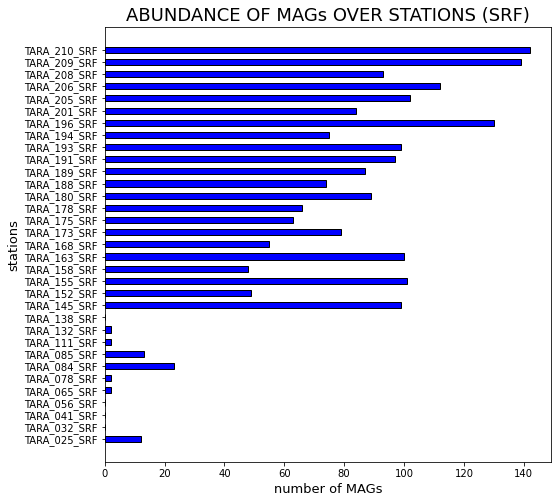

In [4]:
''' Abundance of MAGs over surface stations . We will use a barplot. ax.barh() to have the horizontal visualization'''

stations_SRF = [mdict[i]["station"] for i in range(len(mdict)) 
                if "SRF" in mdict[i]["station"]]
toa_counts_SRF = [len(mdict[i]["TOAS"]) for i in range(len(mdict)) 
                  if "SRF" in mdict[i]["station"]]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.barh(stations_SRF, toa_counts_SRF, height = 0.5,color = 'blue', edgecolor='black')
# ax.set_xscale("log")

plt.title("ABUNDANCE OF MAGs OVER STATIONS (SRF)", fontsize = 18)
plt.ylabel("stations", fontsize = 13)
plt.xlabel("number of MAGs", fontsize = 13)
plt.show()

In [5]:
'''    '''

depth = "SRF"                                                                

stations = []                                                                
proks = []                                                                   
for i in range(len(mdict)):                                                  
    if depth in mdict[i]["station"]:                                         
        stations.append(mdict[i]["station"])                                 
        full_prokkas = []                                                    
        toa_bins = mdict[i]["TOAS"]                                          
        sdict = mdict[i]["EC_DICT"]                                          
        for toa in toa_bins:                                                 
            prokkas = sdict[toa]["EC_PROKKAS"]                               
            full_prokkas.append(prokkas)                                       
        full_prokkas = [item for prok in full_prokkas for item in prok]      
        final_prokkas = np.unique(full_prokkas)                                        
        proks.append(final_prokkas)                                          
prok_counts = [len(prok) for prok in proks]

print("surface stations:",len(prok_counts))

surface stations: 33


From the SRF selection of MAGs and ECs we can create a list of relative abundances over the stations, the first step is to discard the empty stations.

In [6]:

ec_counts = []

for ec in prok_counts:
    if ec > 1:
        ec_counts.append(ec)

        
print(prok_counts)
print(ec_counts)

#plt.figure(figsize=(8, 8))
#plt.hist(ec_counts, bins = 20, edgecolor='black', align = 'mid')

#plt.show()

[1548, 0, 0, 0, 645, 611, 1495, 1341, 606, 710, 0, 2106, 1950, 2117, 1740, 2110, 1827, 1950, 1848, 1877, 2002, 1999, 1991, 2071, 2032, 1950, 2154, 2015, 2066, 2138, 1993, 2165, 2170]
[1548, 645, 611, 1495, 1341, 606, 710, 2106, 1950, 2117, 1740, 2110, 1827, 1950, 1848, 1877, 2002, 1999, 1991, 2071, 2032, 1950, 2154, 2015, 2066, 2138, 1993, 2165, 2170]


In [7]:

stations = []                                                                
bins = [] 
toa_counts = []


for i in range(len(mdict)):                                                  
    if depth in mdict[i]["station"]:                                         
        stations.append(mdict[i]["station"])
        bins.append(mdict[i]["TOAS"])
        
bin_counts = [len(bin) for bin in bins]

'''   '''

for bin in bin_counts:
    if bin > 1:
        toa_counts.append(bin)
        
print(bin_counts)
print(toa_counts)

[12, 0, 0, 0, 2, 2, 23, 13, 2, 2, 0, 99, 49, 101, 48, 100, 55, 79, 63, 66, 89, 74, 87, 97, 99, 75, 130, 84, 102, 112, 93, 139, 142]
[12, 2, 2, 23, 13, 2, 2, 99, 49, 101, 48, 100, 55, 79, 63, 66, 89, 74, 87, 97, 99, 75, 130, 84, 102, 112, 93, 139, 142]


Histograms at different bins width and density curve to have a first visualization on how MAGs are distributed over the stations.

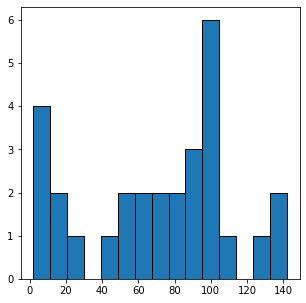

average: 70.3103448275862
STD: 41.78442495531811


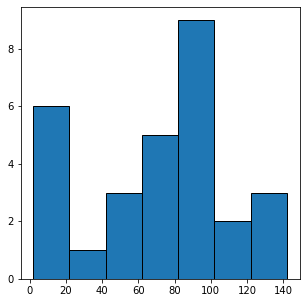

<AxesSubplot:ylabel='Density'>

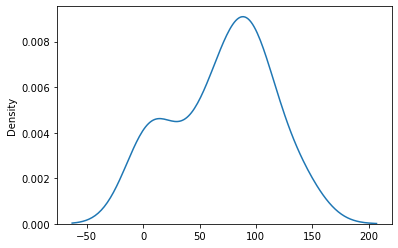

In [8]:
plt.figure(figsize=(5,5))
plt.hist(toa_counts, bins=15, edgecolor='black', align='mid')
plt.show()

print("average:",np.mean(toa_counts))
print('STD:',np.std(toa_counts))

plt.figure(figsize=(5,5))
plt.hist(toa_counts, bins=7, edgecolor='black', align='mid')
plt.show()

sns.kdeplot(toa_counts, x="MAGs")


## Analysis

1.

I will create the environmental dataframe choosing features from the environmental sheet of the excell file, assuming that datas are ordinated over the entire file and that order is the same that of the ordered dictionary.

In [9]:
#path = 'C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\41564_2021_979_MOESM4_ESM.xlsx'
#env_data = pd.read_excel (path, sheet_name = "Suppl_Table_04",index_col=[0])
# df_tab_04.to_csv('C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\env_data.csv')

env_data = pd.read_csv('C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\env_data.csv', index_col=[0])

for col in env_data.columns:
    print(col)

Station.label.num
PANGAEA.sample.id
Station.label
Layer
polar
lower.size.fraction
upper.size.fraction
Event.date
Latitude
Longitude
Depth.nominal
Ocean.region
Temperature
Oxygen
ChlorophyllA
Carbon.total
Salinity
Gradient.Surface.temp.SST.
Fluorescence
CO3
HCO3
Density
PO4
PAR.PC
NO3
Si
Alkalinity.total
Ammonium.5m
Depth.Mixed.Layer
Lyapunov
NO2
Depth.Min.O2
NO2NO3
Nitracline
Brunt.V.is.l.
Iron.5m
Depth.Max.O2
Okubo.Weiss
Residence.time
MP.biome
BG.province
OS.region
Sea.ice.conc
Season
Moon.phase.nominal
Moon.phase.proportion
Age.days
DAYLENGTH
Arctic.subArctic.regions


In [10]:
''' environmental dataframe '''

env_selected = env_data[["Station.label.num", "Oxygen","Salinity","Latitude","Temperature","ChlorophyllA"]]

env_selected.set_index('Station.label.num')

SRF_data = env_selected[env_selected['Station.label.num'].str.contains('SRF')]
print(list(SRF_data.columns))

SRF_data.drop([3, 5, 7, 26], axis = 0, inplace = True)       # to drop empty stations

SRF_data['EC_counts']=np.array(ec_counts)
SRF_data['MAGs']=np.array(toa_counts)

SRF_data

['Station.label.num', 'Oxygen', 'Salinity', 'Latitude', 'Temperature', 'ChlorophyllA']


C:\Users\a_lon\AppData\Local\Temp\ipykernel_16696\2629396017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRF_data.drop([3, 5, 7, 26], axis = 0, inplace = True)       # to drop empty stations
C:\Users\a_lon\AppData\Local\Temp\ipykernel_16696\2629396017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SRF_data['EC_counts']=np.array(ec_counts)
C:\Users\a_lon\AppData\Local\Temp\ipykernel_16696\2629396017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Station.label.num,Oxygen,Salinity,Latitude,Temperature,ChlorophyllA,EC_counts,MAGs
1,TARA_025_SRF,217.809833,38.185333,39.3888,18.319192,0.104797,1548,12
10,TARA_065_SRF,207.581200,35.449638,-35.1728,21.763570,0.176479,645,2
13,TARA_078_SRF,221.138450,36.325530,-30.1367,20.077750,0.066207,611,2
14,TARA_084_SRF,338.526000,33.719800,-60.2287,1.903400,0.207979,1495,23
17,TARA_085_SRF,344.812350,34.327465,-62.0385,0.731590,0.276495,1341,13
20,TARA_111_SRF,209.100300,35.982690,-16.9601,22.781830,0.154999,606,2
23,TARA_132_SRF,197.724500,35.190250,31.5213,25.164595,0.101563,710,2
28,TARA_145_SRF,236.789250,35.121520,39.2305,13.993715,0.169817,2106,99
30,TARA_152_SRF,242.840500,35.991670,43.6792,14.316750,0.191493,1950,49
33,TARA_155_SRF,271.064125,35.325220,54.5305,11.095470,0.772148,2117,101


## EDA: correlation matrix and scatter plot analysis

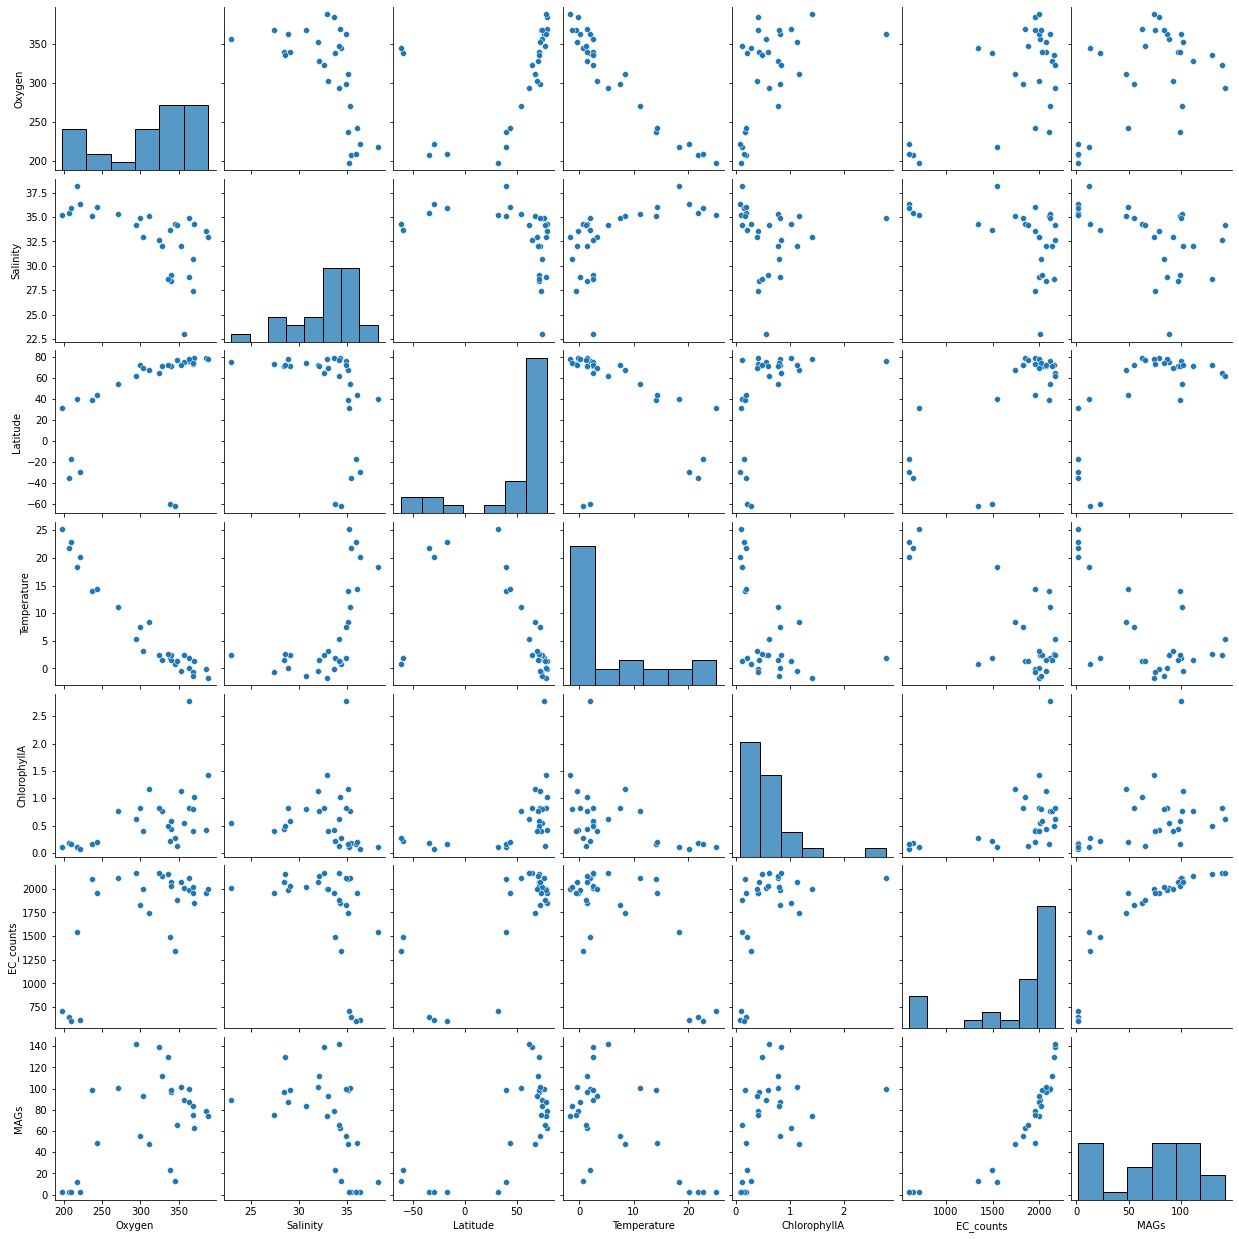

In [20]:
sns.pairplot(SRF_data, height = 2.5)

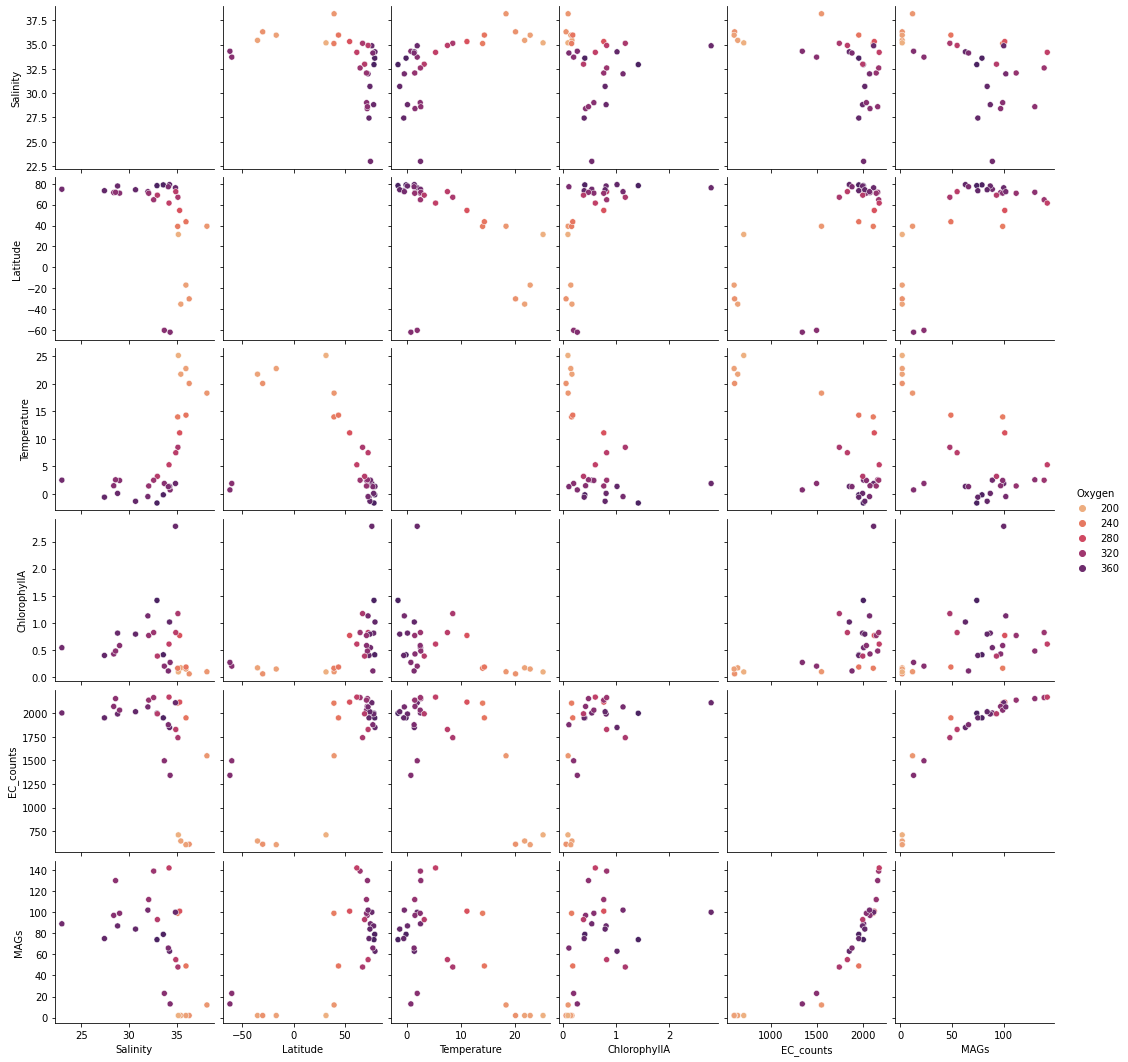

In [31]:
sns.pairplot(SRF_data, hue = "Oxygen", palette="flare", height = 2.5)


<function matplotlib.pyplot.show(close=None, block=None)>

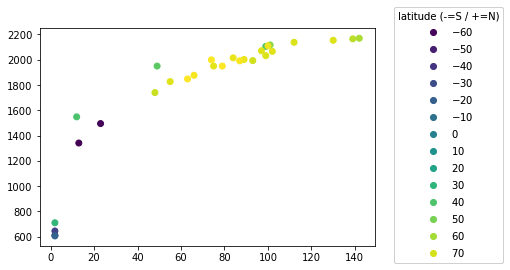

In [12]:
x = toa_counts
y = ec_counts
z = SRF_data.loc[:, "Latitude"]
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z)
legend1 = ax.legend(bbox_to_anchor =(1.4,-0.1),
                    *scatter.legend_elements(),
                    loc="lower right", title="latitude (-=S / +=N)")
ax.add_artist(legend1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

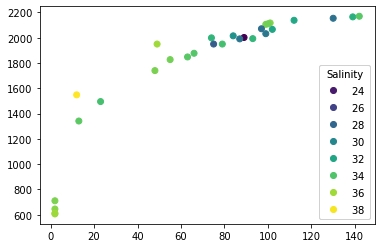

In [17]:
x = toa_counts
y = ec_counts
z = SRF_data.loc[:, "Salinity"]
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z)
legend1 = ax.legend(bbox_to_anchor =(1,0),
                    *scatter.legend_elements(),
                    loc="lower right", title="Salinity")
ax.add_artist(legend1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

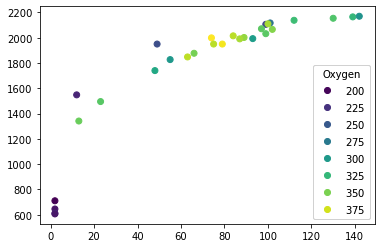

In [19]:
x = toa_counts
y = ec_counts
z = SRF_data.loc[:, "Oxygen"]
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z)
legend1 = ax.legend(bbox_to_anchor =(1,0),
                    *scatter.legend_elements(),
                    loc="lower right", title="Oxygen")
ax.add_artist(legend1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

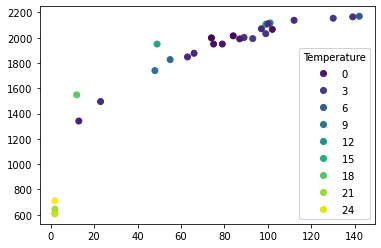

In [23]:
x = toa_counts
y = ec_counts
z = SRF_data.loc[:, "Temperature"]
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z)
legend1 = ax.legend(bbox_to_anchor =(1,0),
                    *scatter.legend_elements(),
                    loc="lower right", title="Temperature")
ax.add_artist(legend1)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

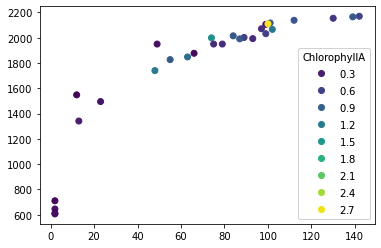

In [26]:
x = toa_counts
y = ec_counts
z = SRF_data.loc[:, "ChlorophyllA"]
fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=z)
legend1 = ax.legend(bbox_to_anchor =(1,0),
                    *scatter.legend_elements(),
                    loc="lower right", title="ChlorophyllA")
ax.add_artist(legend1)
plt.show

potrebbe aver senso selezionare i dati MAGs > 40 ed EC > 1500? n.b. è il secondo tagli netto ai dati. Perchè hai selezionato solo SRF? 

## Analysis

1.

## Visualizing MAGs and ECs abundances over a map.

In [14]:
path = "C:\\Users\\a_lon\\Desktop\\IISEM\\Bioinf&DataScience\\DATASETS\\"

stations_coordinate = df_tab_04[["Station.label.num","Latitude","Longitude"]]

# stations_coordinate.to_csv (path + 'stations_coordinate.csv')

TOA_coordinate = pd.read_csv(path + 'stations_coordinate.csv',index_col=[0])

#print(TOA_coordinate)
#TOA_coordinate.plot(x="Longitude", y="Latitude", kind="scatter", colormap="YlOrRd")

TOA_coordinate = pd.read_csv(path + 'stations_coordinate.csv',index_col=[0]) # dataframe with coordinates info
TOA_coordinate = TOA_coordinate.set_index(['Station.label.num'])   
TOA_coordinate.drop(["TARA_032_SRF","TARA_041_SRF","TARA_056_SRF","TARA_138_SRF"], inplace=True)

TOA_coordinate

,Latitude,Longitude
Station.label.num,,
TARA_025_DCM,39.3991,19.3997
TARA_025_SRF,39.3888,19.3905
TARA_032_DCM,23.4183,37.2450
TARA_041_DCM,14.5536,70.0128
TARA_056_MES,-15.3379,43.2948
...,...,...
TARA_208_SRF,69.1136,-51.5086
TARA_209_MES,64.7000,-52.9960
TARA_209_SRF,64.7127,-53.0106


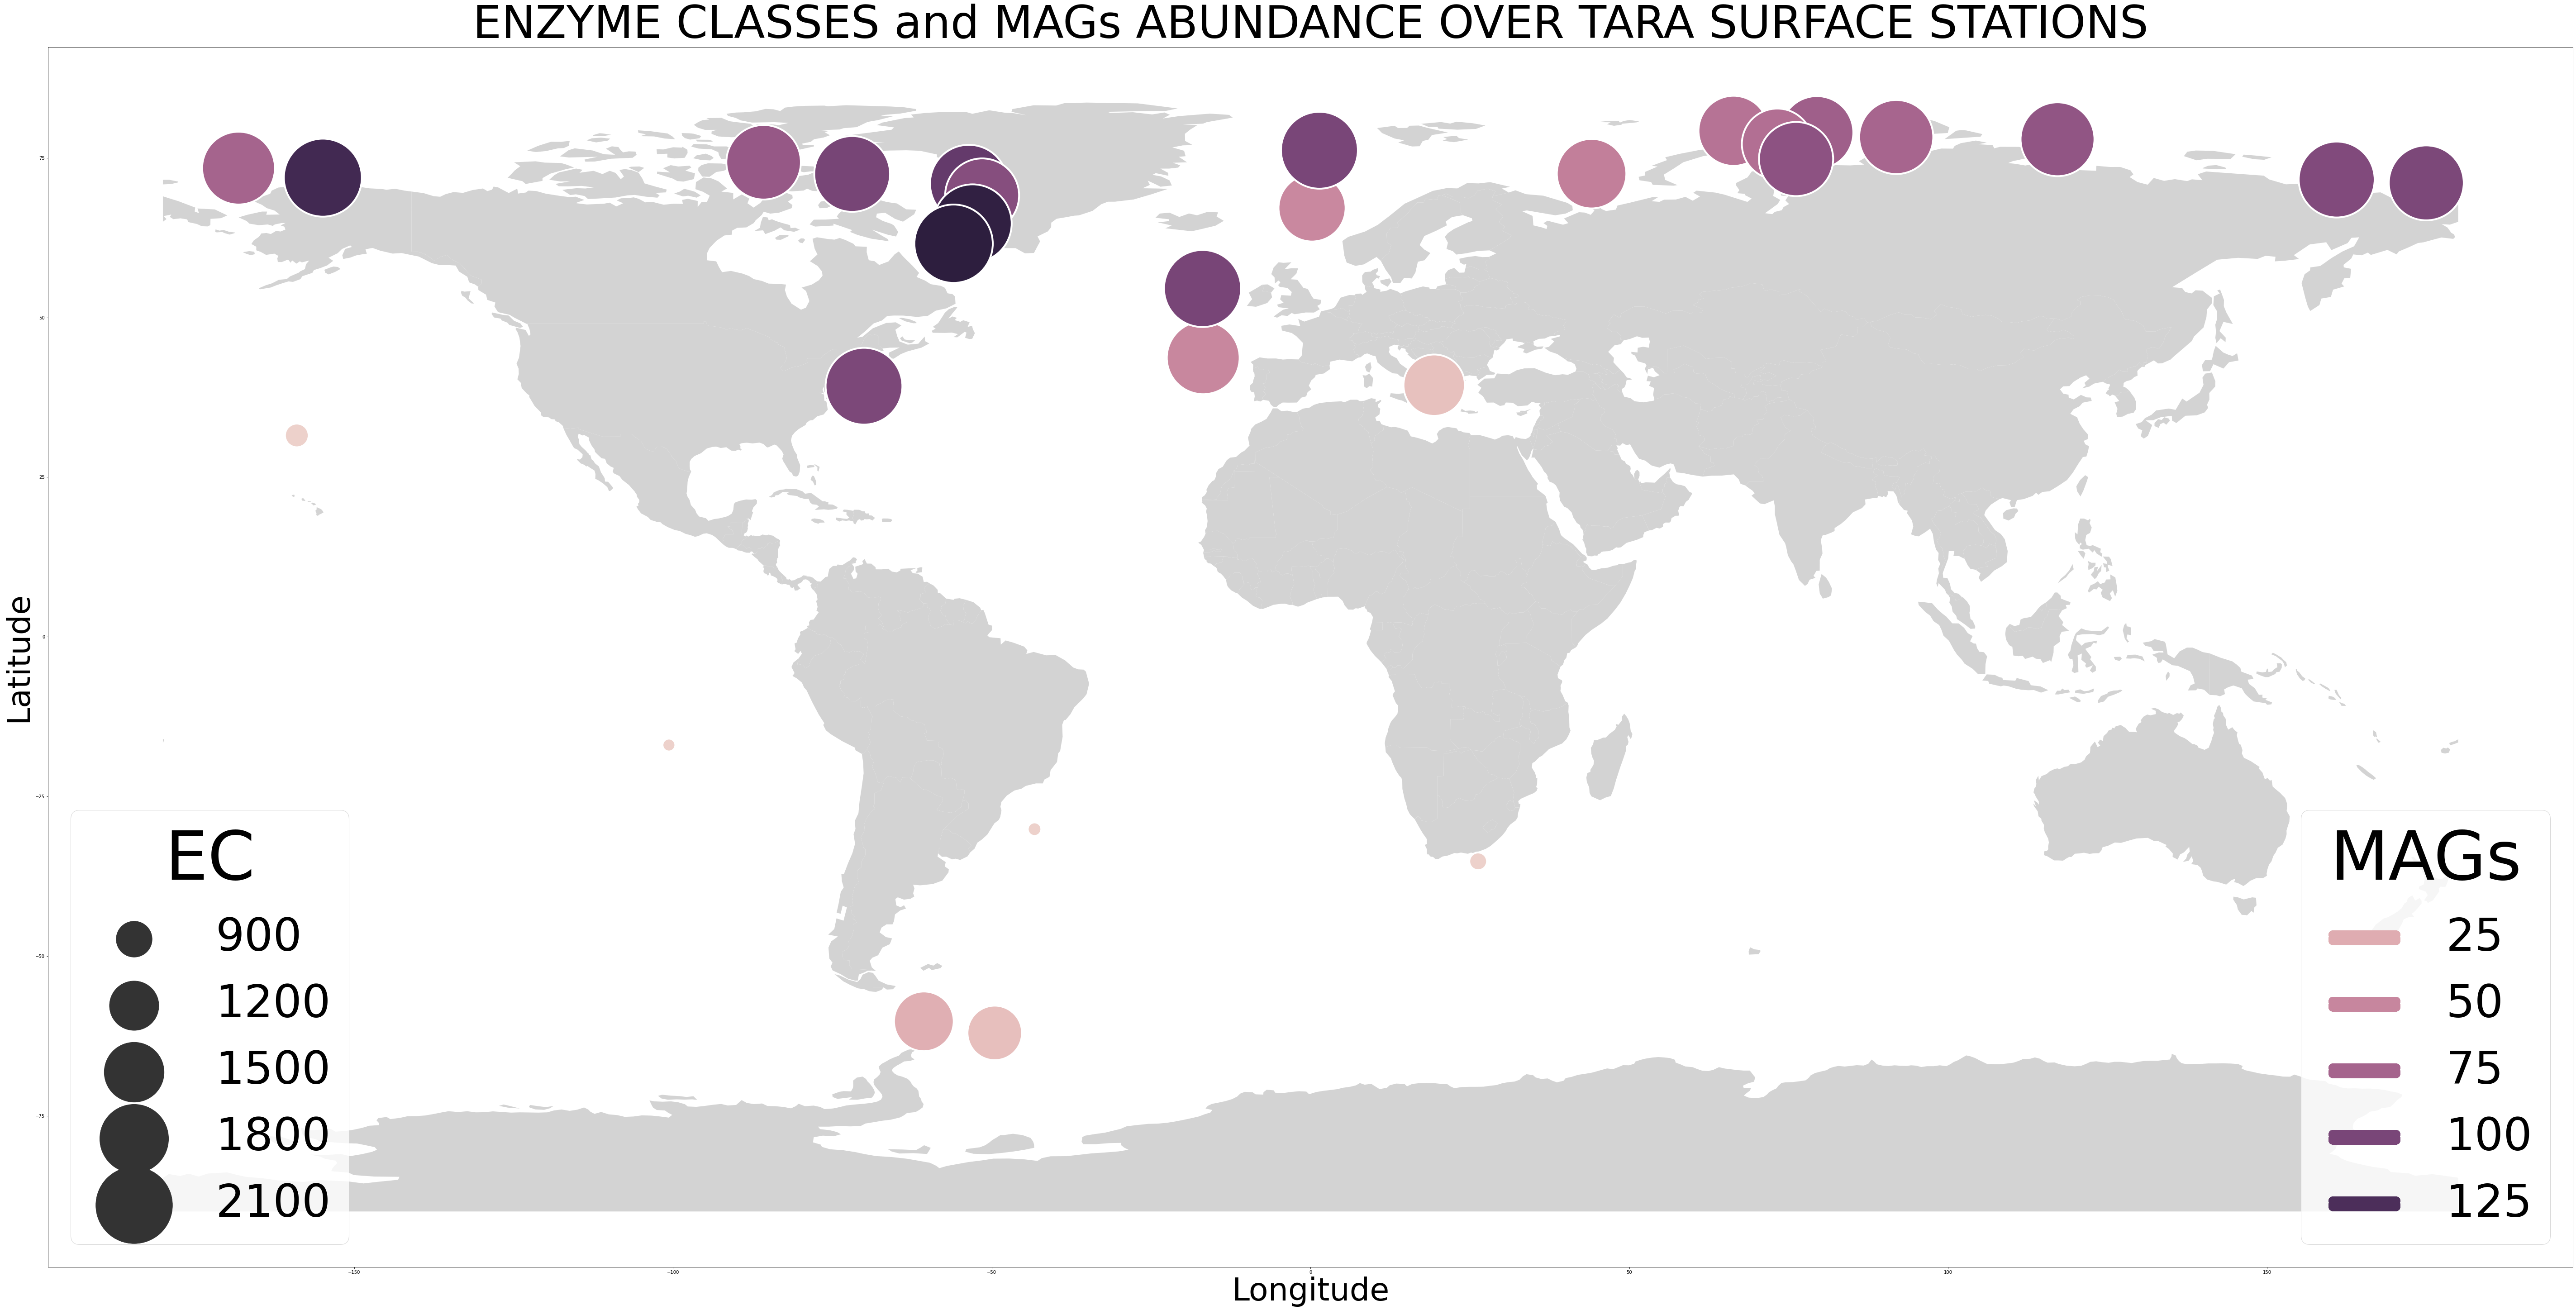

In [15]:

x = []                                                                       # list of x (longitude)
y = []                                                                       # and y (latitude)

for i in range(len(TOA_coordinate)):                                         # for every element in the TOA_coordinate dataframe
    coord = TOA_coordinate.iloc[i]                                           # look at the information in the columns
    if coord.name in stations_SRF:                                           # if there are any coordinate for the station_SRF
        x.append(coord["Longitude"])                                         # assign the longitude to the x
        y.append(coord["Latitude"])                                          # latitude to the y


worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))       

fig, ax = plt.subplots(figsize = (100, 200))

worldmap.plot(color = "lightgrey", ax = ax)                                   

stations = sns.scatterplot(x = x, y = y, hue = toa_counts, size = ec_counts,  sizes = (800, 30000))   # additional scatterplot of EC information 

h,l = stations.get_legend_handles_labels()
l1 = stations.legend(h[:int(len(h)/2)],l[:int(len(l)/2)], title="MAGs", 
                     title_fontsize = 150, fontsize = 100, loc = 'lower right', scatterpoints=5000, markerscale = 3)
stations.add_artist(l1) 
l2 = stations.legend(h[int(len(h)/2):],l[int(len(l)/2):], title="EC",
                     title_fontsize = 150, fontsize = 100, loc='lower left')

plt.title('ENZYME CLASSES and MAGs ABUNDANCE OVER TARA SURFACE STATIONS', fontsize=100)
plt.xlabel("Longitude", fontsize=70)
plt.ylabel("Latitude", fontsize=70)

plt.show() 



## '''plottare separatamente per i tre gruppi di dati. plottare altre variabili nel grafico di dispersione.'''